In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,NaN
2,4.7,3.2,1.3,0.2
3,NaN,3.1,1.5,0.2
4,5.0,3.6,NaN,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	0
float64		column 3	14
float64		column 4	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,129.000000,150.000000,136.000000,129.000000
mean,5.860465,3.054000,3.772794,1.223256
std,0.791598,0.433594,1.699650,0.718561
min,4.300000,2.000000,1.100000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

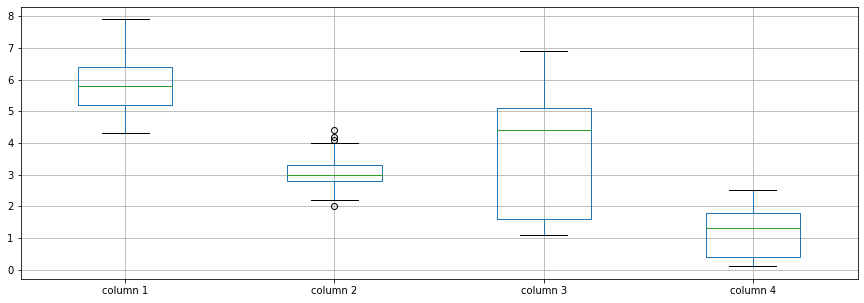

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.860465
column 2    3.054000
column 3    3.772794
column 4    1.223256
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.074451,0.832246,0.772990
column 2,-0.074451,1.000000,-0.468101,-0.415306
column 3,0.832246,-0.468101,1.000000,0.955149
column 4,0.772990,-0.415306,0.955149,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+44,4+44+44,4+44+44+44,4+44+44+44+44,4+44+44+44,4+44+44,4+44,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.085651715596518
Epoch: 1 , loss: 13.026392300923666
Epoch: 2 , loss: 13.04669623904758
Epoch: 3 , loss: 13.031819131639269
Epoch: 4 , loss: 13.080601904127333
Epoch: 5 , loss: 13.031637191772461
Epoch: 6 , loss: 13.100658098856607
Epoch: 7 , loss: 13.1222292582194
Epoch: 8 , loss: 13.119650099012587
Epoch: 9 , loss: 13.008914841545952
Epoch: 10 , loss: 13.000547091166178
Epoch: 11 , loss: 13.143839730156792
Epoch: 12 , loss: 13.08012146419949
Epoch: 13 , loss: 12.987733099195692
Epoch: 14 , loss: 13.119315041436089
Epoch: 15 , loss: 13.135603798760307
Epoch: 16 , loss: 13.04337109459771
Epoch: 17 , loss: 13.14096016354031
Epoch: 18 , loss: 13.016885757446289
Epoch: 19 , loss: 13.101261032952202
Epoch: 20 , loss: 12.992524676852756
Epoch: 21 , loss: 13.054880777994791
Epoch: 22 , loss: 12.99467224544949
Epoch: 23 , loss: 13.066557778252495
Epoch: 24 , loss: 13.113341755337185
Epoch: 25 , loss: 13.0344

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.100000
column 2    3.700000
column 3    0.015696
column 4    0.400000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,-5.084329,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,-0.185117
2,0.000000,0.0,0.000000,0.000000
3,-4.584330,0.0,0.000000,0.000000
4,0.000000,0.0,-1.384714,0.000000
...,...,...,...,...
145,0.000000,0.0,0.000000,0.000000
146,0.000000,0.0,0.000000,0.000000
147,0.000000,0.0,0.000000,0.000000
148,0.000000,0.0,0.000000,-2.285085


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(31.742138500393352, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.32504875493224883

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,0.015671,3.5,1.400000,0.200000
1,4.900000,3.0,1.400000,0.014883
2,4.700000,3.2,1.300000,0.200000
3,0.015670,3.1,1.500000,0.200000
4,5.000000,3.6,0.015286,0.200000
...,...,...,...,...
145,6.700000,3.0,5.200000,2.300000
146,6.300000,2.5,5.000000,1.900000
147,6.500000,3.0,5.200000,2.000000
148,6.200000,3.4,5.400000,0.014915


In [20]:
imputations[-1].to_excel("Iris_NG_10(imp).xlsx", index=False, header=False)